# Midterm Map: Examining Transit Oriented Districts through SB 535 Data

Throug the SB 535 Data we filtered cities that are near or within Transit Oriented Districts to examine what various communties face.

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


SB_535_Disadvantaged_Areas-2

In [18]:
sbda = gpd.read_file('SB_535_Disadvantaged_Areas1.geojson')

Examining the data

In [8]:
type(sbda)

geopandas.geodataframe.GeoDataFrame

In [9]:
sbda.shape

(1020, 65)

In [19]:
sbda.head()

,OBJECTID,GEOID10,Percentile_Range,Population,County,ZIP,City,CIscoreP,Ozone,Ozone_Pctl,...,African_American____,Native_American____,Asian_American____,Other____,MPO,Year,Disadv,Shapearea,Shapelen,geometry
0,1611,6037573003,91-95%,1802,Los Angeles,90806,Long Beach,91,0.042,32,...,14.8,0.4,16.9,2.6,SCAG,2017,yes,4.494828e+05,2746.197982,"POLYGON ((-118.19925 33.79704, -118.20542 33.7..."
1,1613,6037570403,96-100% (highest scores),4587,Los Angeles,90805,Long Beach,96,0.042,32,...,15.3,0.1,4.4,0.9,SCAG,2017,yes,5.715884e+05,3221.874355,"POLYGON ((-118.20057 33.88136, -118.20889 33.8..."
2,1615,6037552302,91-95%,3648,Los Angeles,90650,Norwalk,92,0.046,53,...,5.4,0.2,13.4,1.7,SCAG,2017,yes,9.546470e+05,4581.848493,"POLYGON ((-118.05283 33.90601, -118.05104 33.9..."
3,1616,6037503104,76-80%,2719,Los Angeles,90605,Whittier,79,0.046,53,...,0.1,0.1,2.3,1,SCAG,2017,yes,5.465557e+05,3331.587544,"POLYGON ((-118.03862 33.92128, -118.04232 33.9..."
4,1619,6037550202,76-80%,5496,Los Angeles,90650,Norwalk,75,0.046,53,...,3.9,0.4,6.9,1.7,SCAG,2017,yes,1.265117e+06,5089.349309,"POLYGON ((-118.08175 33.91971, -118.08860 33.9..."


In [11]:
sbda.info

<bound method DataFrame.info of       OBJECTID     GEOID10          Percentile_Range  Population       County  \
0         1611  6037573003                    91-95%        1802  Los Angeles   
1         1613  6037570403  96-100% (highest scores)        4587  Los Angeles   
2         1615  6037552302                    91-95%        3648  Los Angeles   
3         1616  6037503104                    76-80%        2719  Los Angeles   
4         1619  6037550202                    76-80%        5496  Los Angeles   
...        ...         ...                       ...         ...          ...   
1015      3912  6037481603                    76-80%        3802  Los Angeles   
1016      3923  6037404402                    86-90%        5107  Los Angeles   
1017      3949  6037431100                    76-80%        6629  Los Angeles   
1018      3950  6037533603  96-100% (highest scores)        6617  Los Angeles   
1019      3951  6037534101  96-100% (highest scores)        2295  Los Angeles

Okay perfect! It took a while to make sure I filtered the proper cities for the data

<AxesSubplot:>

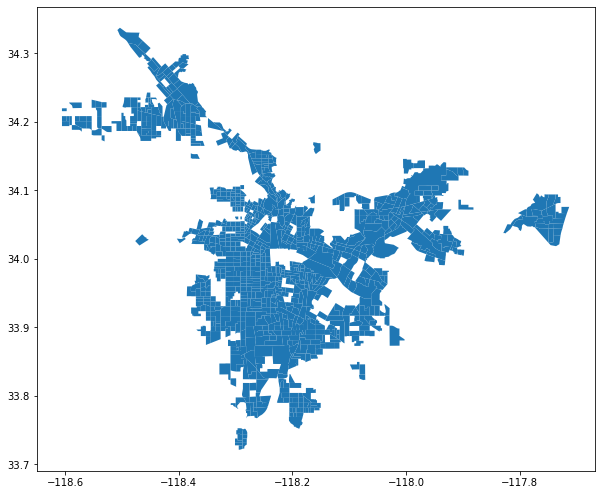

In [20]:
sbda.plot(figsize=(10,10))

Now the shape may look odd but this is based on data from evaluating disadvantge communties. It does not include data for example about Beverly Hills.

In [21]:
sbda['City'].value_counts()

Los Angeles        380
Long Beach          57
Van Nuys            30
North Hollywood     29
Compton             29
                  ... 
Artesia              1
Signal Hill          1
Tarzana              1
Duarte               1
Monrovia             1
Name: City, Length: 62, dtype: int64

Understasing the value count and the different cities we captures

In [22]:
sbda['County'].value_counts()

Los Angeles    1019
Name: County, dtype: int64

Here's a test to the different columns

In [23]:
sbda[['Population', 'Ozone','Ozone_Pctl','City','ZIP']]  

,Population,Ozone,Ozone_Pctl,City,ZIP
0,1802,0.042,32,Long Beach,90806
1,4587,0.042,32,Long Beach,90805
2,3648,0.046,53,Norwalk,90650
3,2719,0.046,53,Whittier,90605
4,5496,0.046,53,Norwalk,90650
...,...,...,...,...,...
1014,3802,0.050,65,Alhambra,91801
1015,5107,0.053,74,Azusa,91702
1016,6629,0.053,74,Monrovia,91016
1017,6617,0.046,53,Bell,90201


Seeing the columns and what would be best capture in chart or map

In [24]:
sbda.columns.to_list()

['OBJECTID',
 'GEOID10',
 'Percentile_Range',
 'Population',
 'County',
 'ZIP',
 'City',
 'CIscoreP',
 'Ozone',
 'Ozone_Pctl',
 'PM2_5',
 'PM_2_5_Pctl',
 'Diesel_PM_Pctl',
 'DrinkingWater_Pctl',
 'Pesticides',
 'Pesticides_Pctl',
 'Tox_Releases',
 'Tox_Releases_Pctl',
 'Traffic',
 'Traffic_Pctl',
 'Cleanups',
 'Cleanups_Pctl',
 'GroundwaterThreats',
 'GroundWater_Threats_Pctl',
 'Haz_Waste',
 'Haz_Waste_Pctl',
 'Imp__Water_Bodies',
 'Imp__Water_Bodies_Pctl',
 'Solid_Waste',
 'Solid_Waste_Pctl',
 'PollutionScore',
 'Pollution_Burden_Pctl',
 'Asthma',
 'Asthma_Pctl',
 'Low_Birth_Weight',
 'Low_Birth_Weight_Pctl',
 'Cardiovascular',
 'Cardiovascular_Pctl',
 'Education',
 'Education_Pctl',
 'Linguistic_Isolation',
 'Linguistic_Isolation_Pctl',
 'Poverty',
 'Poverty_Pctl',
 'Unemployment',
 'Unemployment_Pctl',
 'Housing_Burden',
 'Housing_Burden_Pctl',
 'PopCharScore',
 'Pop__Characteristics_Pctl',
 'Children___10____',
 'Pop_11_64_years____',
 'Elderly___65____',
 'Hispanic____',
 'White_

'Housing_Burden_Pctl'
'Asthma_Pctl'
'Traffic_Pctl'
'Ozone_Pctl'

I began to outline the boudaries to make sure I have all the cities I filtered that are near or within transit oriented distircts

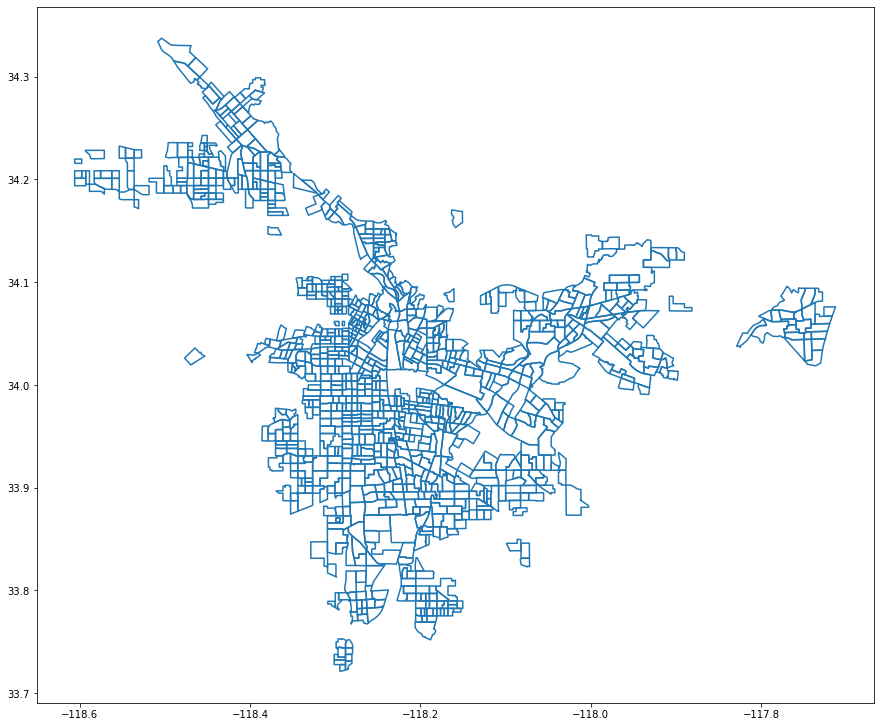

In [25]:
sbda.boundary.plot(figsize = (15,15));

## Housing Burden Percentile for Cities Near Transit Oriented Districts

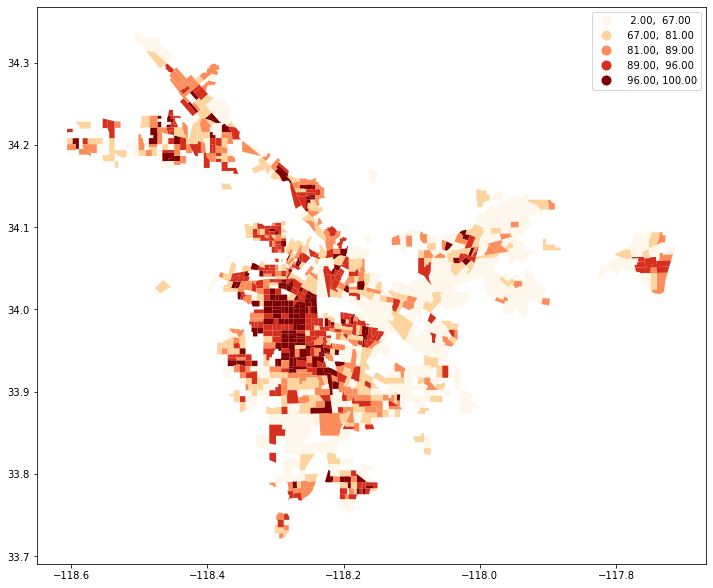

In [26]:
sbda.plot(
    column='Housing_Burden_Pctl', 
    legend = True,
    cmap='OrRd', 
    scheme='quantiles',
    figsize = (12,12),
);

In [16]:
## Ozone Percentile for Cities Near Transit Oriented Districts

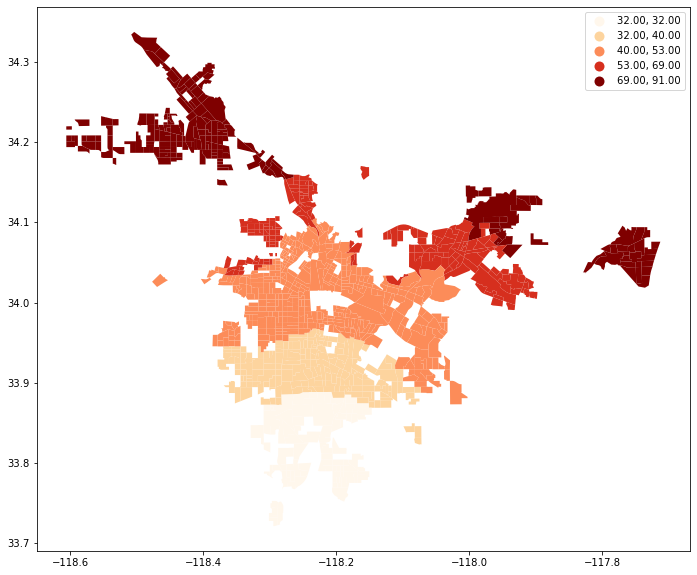

In [28]:
sbda.plot(
    column='Ozone_Pctl', 
    legend = True,
    cmap='OrRd', 
    scheme='NaturalBreaks',
    figsize = (12,10),
);

## Asthma Percentile for Cities Near Transit Oriented Districts

Since we are examining the TOD's using a choleropath first help see the high percentage , here we see a major area where people have asthma, If we overlay a basemap it can potentially show the freeways in the areas 

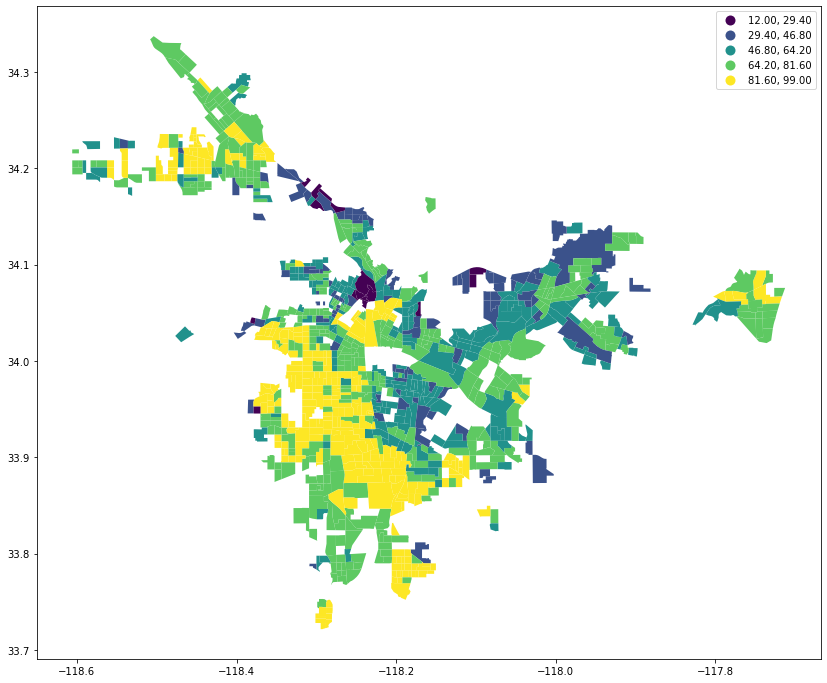

In [29]:
sbda.plot(
    column= 'Asthma_Pctl', 
    legend=True,
    scheme= "equal_interval",
    figsize=(15, 12),
    
 );

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts Asthma Percentile'}, ylabel='Frequency'>

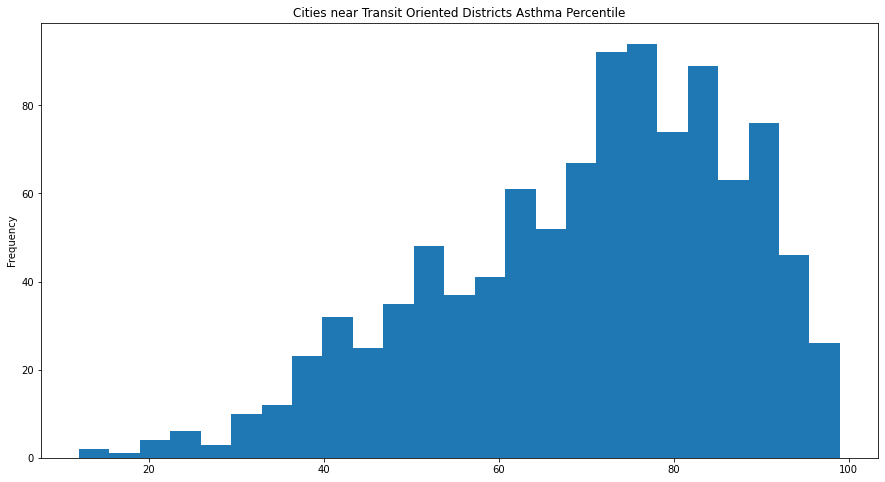

In [30]:
sbda['Asthma_Pctl'].plot.hist(figsize=(15,8),bins= 25, title='Cities near Transit Oriented Districts Asthma Percentile')

In [ ]:
Plotting the Ashthma frequency 

In [ ]:
Here we are plotting a Histogram on the Asthma Percentile, I am personally having trouble capturing the x title - potentialy needs to subset the data

## Traffic Percentile for Cities Near Transit Oriented Districts

Here we are tinkering with Chlorepath Maps and the various percentile seen in the Disadvantage communities

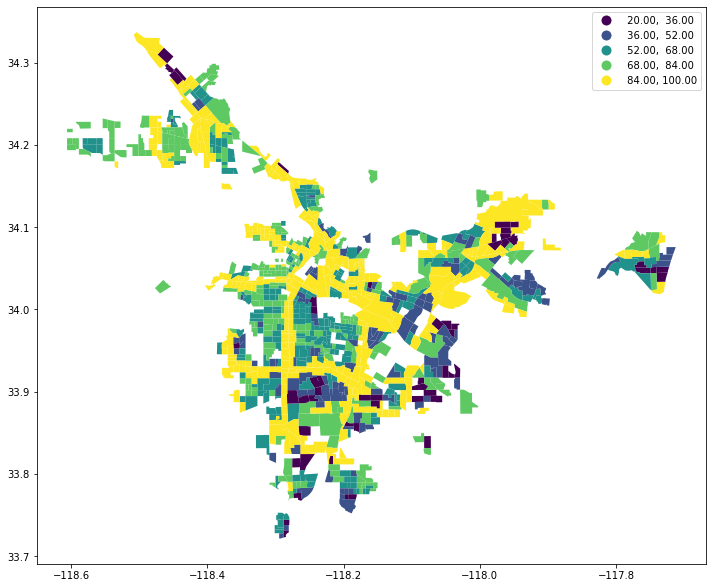

In [31]:
sbda.plot(
    column= 'Traffic_Pctl', 
    legend=True,
    scheme= "equal_interval",
    figsize=(12, 12),
 );

*Note adding a baselayer for LA couunty to add some famialarity, also define how this is data is collected

In [ ]:
Highlighting the ozone frequnecy 

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts Ozone Percentile'}, ylabel='Frequency'>

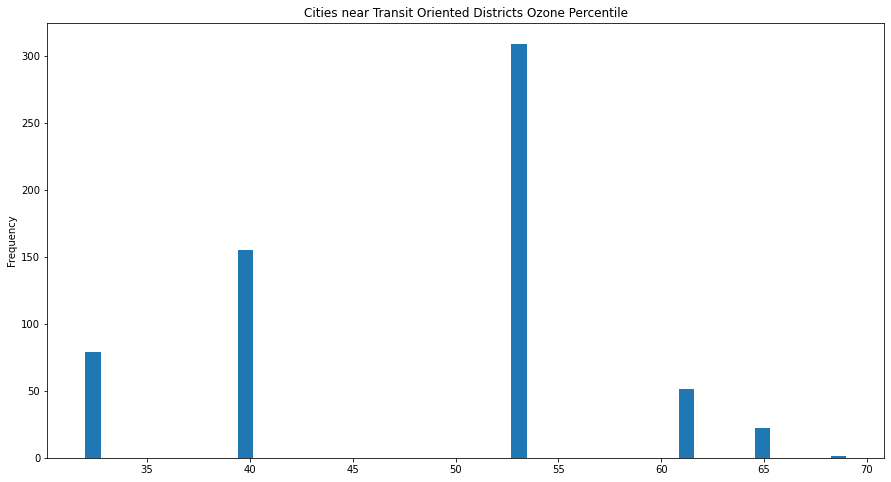

In [62]:
sbda['Ozone_Pctl'].plot.hist(figsize=(15,8),bins=50,title='Cities near Transit Oriented Districts Ozone Percentile')

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts facing Housing Burden'}, ylabel='Frequency'>

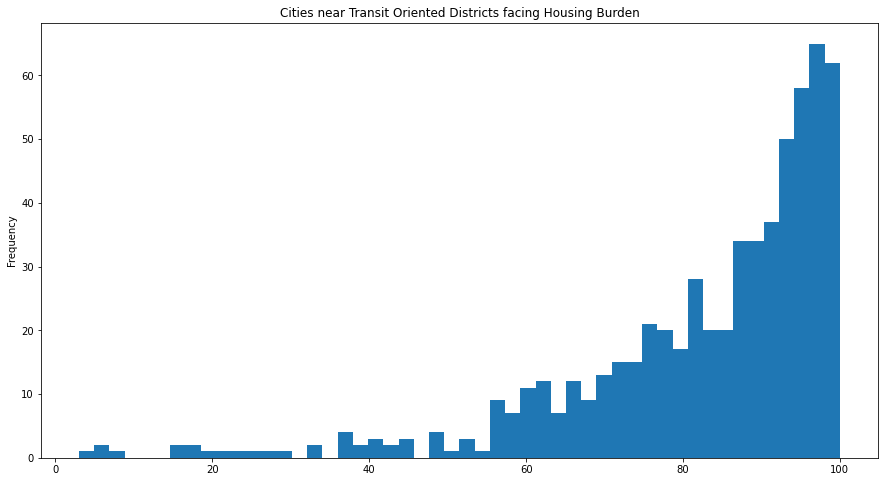

In [61]:
sbda['Housing_Burden_Pctl'].plot.hist(figsize=(15,8),bins=50, title='Cities near Transit Oriented Districts facing Housing Burden')

In [21]:
gdf_web_mercator = sbda.to_crs(epsg=3857)

Using Webmercator to add base maps!

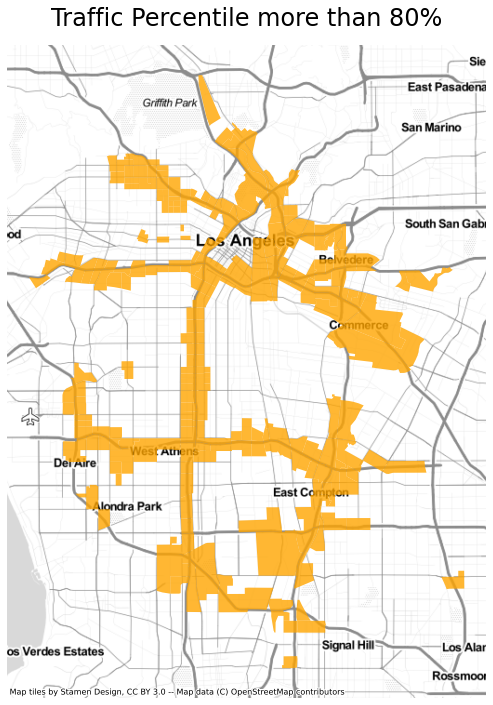

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Traffic_Pctl'] > 80].plot(
                                                               ax=ax, 
                                                               color="orange",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Traffic Percentile more than 80%',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

This is a great map for comparison with the cholrepath map

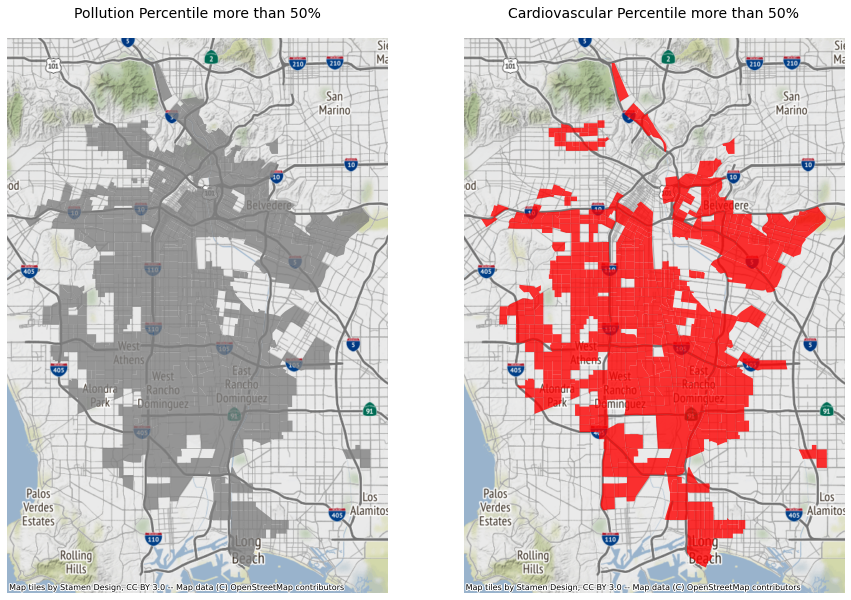

In [31]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Pollution_Burden_Pctl'] > 50].plot(ax=ax1, 
                                                                           alpha=0.8, 
                                                                           color="grey")

ax1.axis("off")
ax1.set_title('Pollution Percentile more than 50%',fontsize=14, pad=20)

# add a basemap
ctx.add_basemap(ax1) # default zoom

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Cardiovascular_Pctl'] > 50].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="red")


ax2.axis("off")
ax2.set_title('Cardiovascular Percentile more than 50%',fontsize=14, pad=20)
# add a basemap
ctx.add_basemap(ax2) 


Next we made a subplot map! Great to compare with the pollution in the area and people facing cardivascular problems in the area